# IT41 Project

## Introduction

- use of sorting algorithms
- issues with sorting algorithms
    - time complexity
    - space complexity
    - algo stable 

##### Sorting algorithms:
- Bogosort
- Bubble sort
- Insertion sort
- Selection sort
- Merge sort
- Quick sort


In [54]:
import time, random, matplotlib.pyplot as plt, math

MAX_TEST = 5000
x_size = []
test_arr = [[] for _ in range(MAX_TEST)]

algo_dict = {
    'bubble_sort': {'title': 'Bubble sort', 'color': 'g', 'y_time': []},
    'insertion_sort': {'title': 'Insertion sort', 'color': 'y', 'y_time': []},
    'selection_sort': {'title': 'Selection sort', 'color': 'c', 'y_time': []},
    'merge_sort': {'title': 'Merge sort', 'color': 'm', 'y_time': []},
    'quick_sort': {'title': 'Quick sort', 'color': 'r', 'y_time': []},
}


def generate_test_data():
    global x_size, test_arr
    _j = 0
    for _i in range(1, MAX_TEST + 1, MAX_TEST // (MAX_TEST // 50)):
        test_arr[_j] = random.sample(range(-10000, 90000), _i)
        x_size.append(_i)
        _j += 1


def testing_algorithm(algo, arr):
    start = time.time()
    algo(arr)
    end = time.time()
    return end - start


def plot_time(algo):
    global algo_dict, test_arr
    algo_info = algo_dict.get(algo.__name__, {'title': 'Unknown algorithm', 'color': 'k', 'y_time': []})
    y_time = []
    for i in range(MAX_TEST // 50):
        y_time.append(testing_algorithm(algo, test_arr[i]))
    algo_info['y_time'] = y_time
    algo_dict[algo.__name__] = algo_info
    plt.title(algo_info['title'] + ' execution')
    plt.xlabel('Size of the array')
    plt.ylabel('Time of execution (seconds)')
    plt.plot(x_size, y_time, algo_info['color'], label=algo.__name__)
    plt.show()


generate_test_data()

### Bogosort:

### Bubble sort:

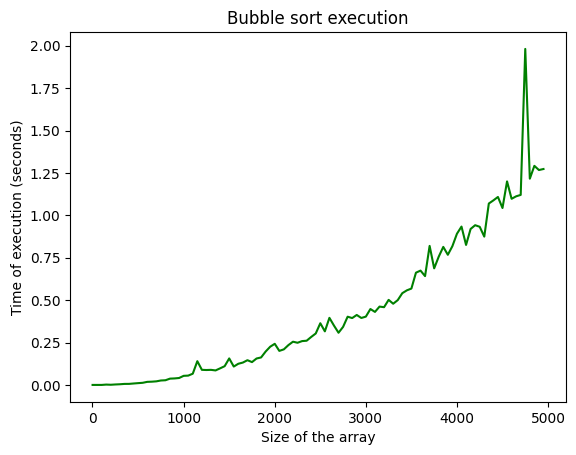

In [55]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


plot_time(bubble_sort)

### Insertion sort:

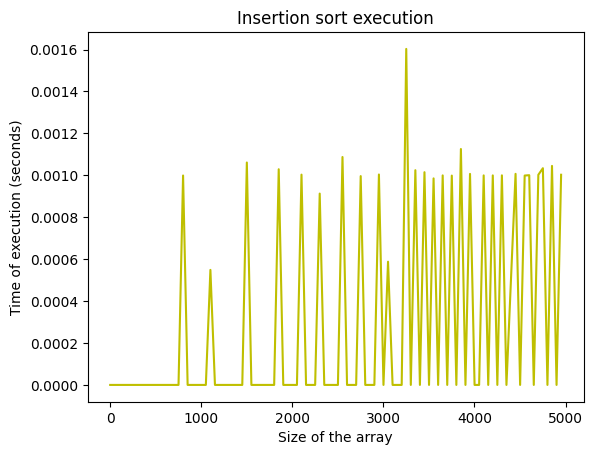

In [56]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        current = arr[i]
        j = i - 1
        while j >= 0 and current < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = current
    return arr


plot_time(insertion_sort)

### Selection sort:

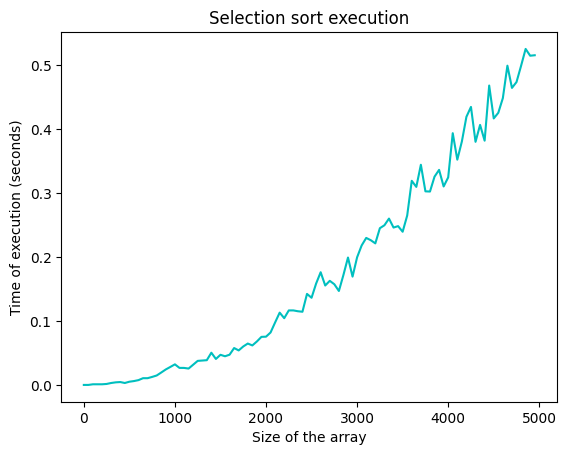

In [57]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[min_index] > arr[j]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr


plot_time(selection_sort)

### Merge sort:

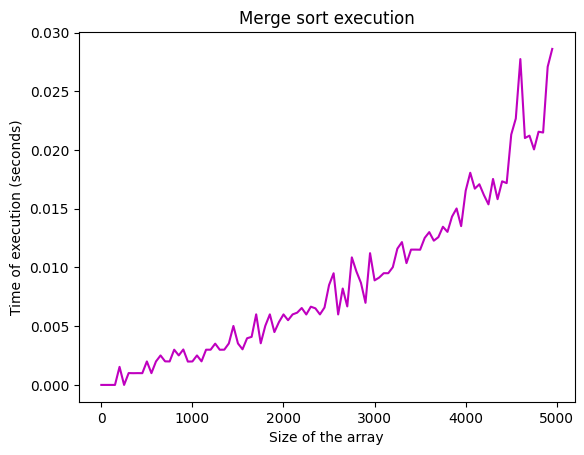

In [58]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        middle = len(arr) // 2
        left = merge_sort(arr[:middle])
        right = merge_sort(arr[middle:])
        arr = merge(left, right)
        return arr


def merge(left, right):
    result = []
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    if len(left) > 0:
        result += left
    if len(right) > 0:
        result += right
    return result


plot_time(merge_sort)

### Quick sort:

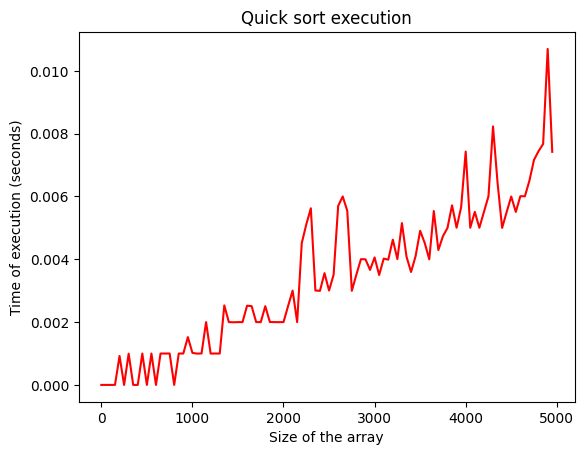

In [59]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    # We use the 'random' library for the pivot
    # to statistically reduce the worst case sorting situations
    pivot = random.choice(arr)
    lower = []
    equal = []
    greater = []
    for item in arr:
        if item < pivot:
            lower.append(item)
        elif item > pivot:
            greater.append(item)
        else:
            equal.append(item)
    return quick_sort(lower) + equal + quick_sort(greater)


plot_time(quick_sort)

### Sorting algorithms comparison:

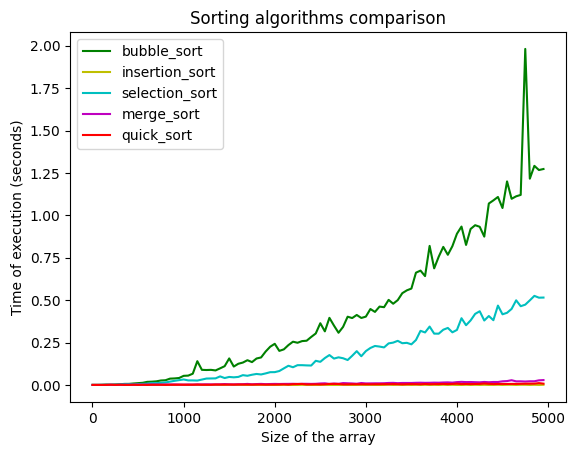

In [60]:
for algo in algo_dict:
    plt.plot(x_size, algo_dict[algo]['y_time'], algo_dict[algo]['color'], label=algo)
plt.title('Sorting algorithms comparison')
plt.xlabel('Size of the array')
plt.ylabel('Time of execution (seconds)')
plt.legend()
plt.show()